### Stroke Prediction Data Analysis

In [2]:
#import necessary libraries
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/hp/Desktop/Python Projects/Stroke Prediction Dataset.csv')

print("The dimension of the table is:", data.shape)

The dimension of the table is: (5110, 12)


In [3]:
#showing first 5 rows of data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.describe()
#there are missing data in bmi

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
#can briefly check the missing data status
data.describe(include=['O'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


<b>Histogram</b>

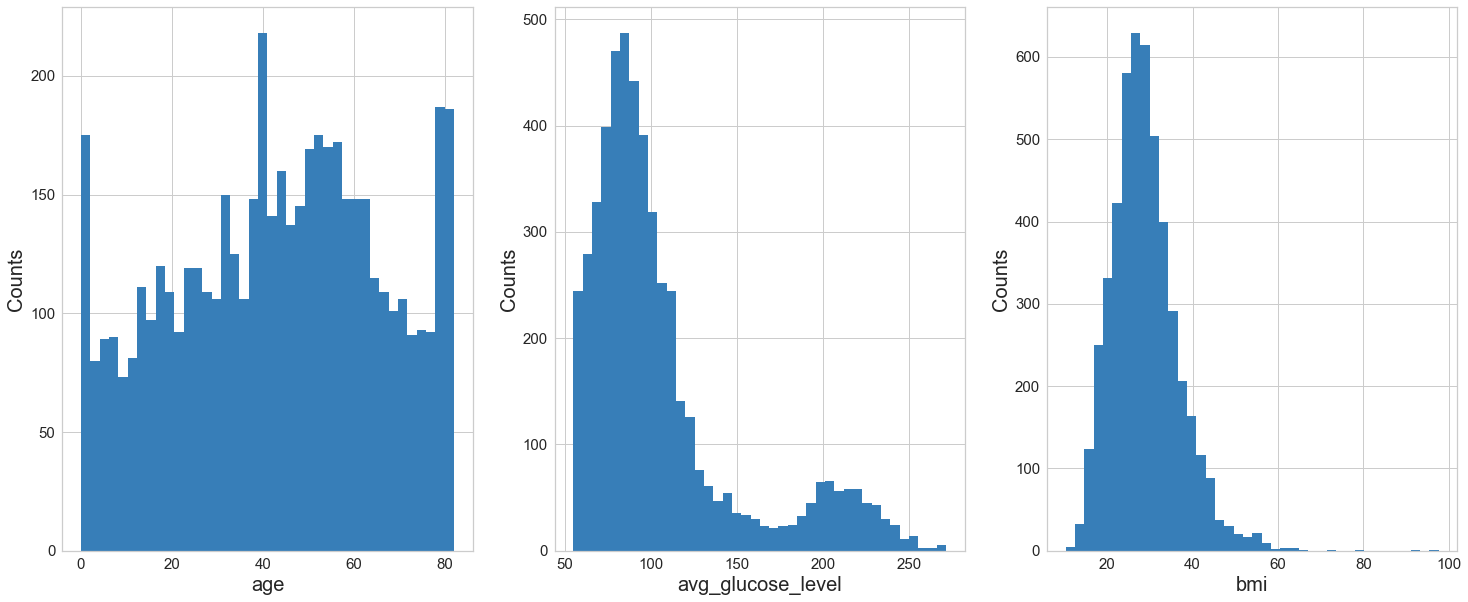

In [30]:
#import visualization packages
import matplotlib.pyplot as plt

#set up figure size
%matplotlib inline
#state figure size
plt.rcParams['figure.figsize'] = (25,10)

#make subplots
fig, axes=plt.subplots(nrows=1, ncols=3)

#histogram x-axis
num_features=['age', 'avg_glucose_level', 'bmi']
xaxes = num_features
#histogram y-axis
yaxes = ['Counts', 'Counts', 'Counts']

#draw histogram
axes = axes.ravel() #functions returns contiguous flattened array
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
    

From this histogram, we see that all values in the variables seem in the correct range.
Age is distributed from 0-80, # of stroke increases as people reaches age of 60.

<b>Numerical Correlationn - Pearson Ranking Visualization </b>
<br></br>
Look for whether numerical variables in dataset are corrrelated<br />

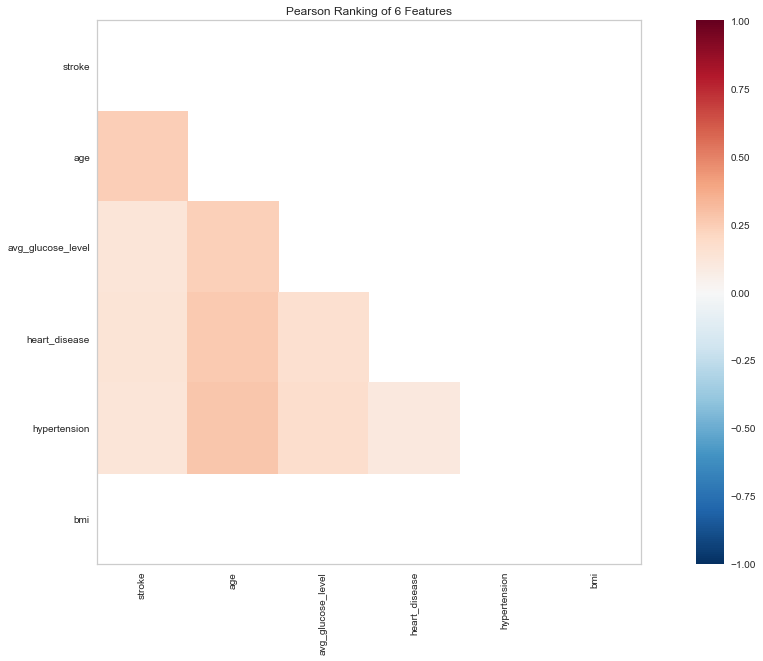

<AxesSubplot:title={'center':'Pearson Ranking of 6 Features'}>

In [33]:
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)

#import package for visualization of correlation
from yellowbrick.features import Rank2D

#extract the numpy arrays from the dataframe
var = ['stroke','age','avg_glucose_level', 'heart_disease','hypertension','bmi']
X=data[var].to_numpy()

#instantiate the visualizer with the covariance ranking algorithm
visualizer = Rank2D(features=var, algorithm='pearson')
visualizer.fit(X) #fit data to visualizer
visualizer.transform(X)
visualizer.poof()

<b>Distribution of numerical variables</b>
<br></br>
we will compare the distributions of numerical variables between people who had and had not have stroke. We can do this with a <b>Parallel Coordinates visualization.</b> 

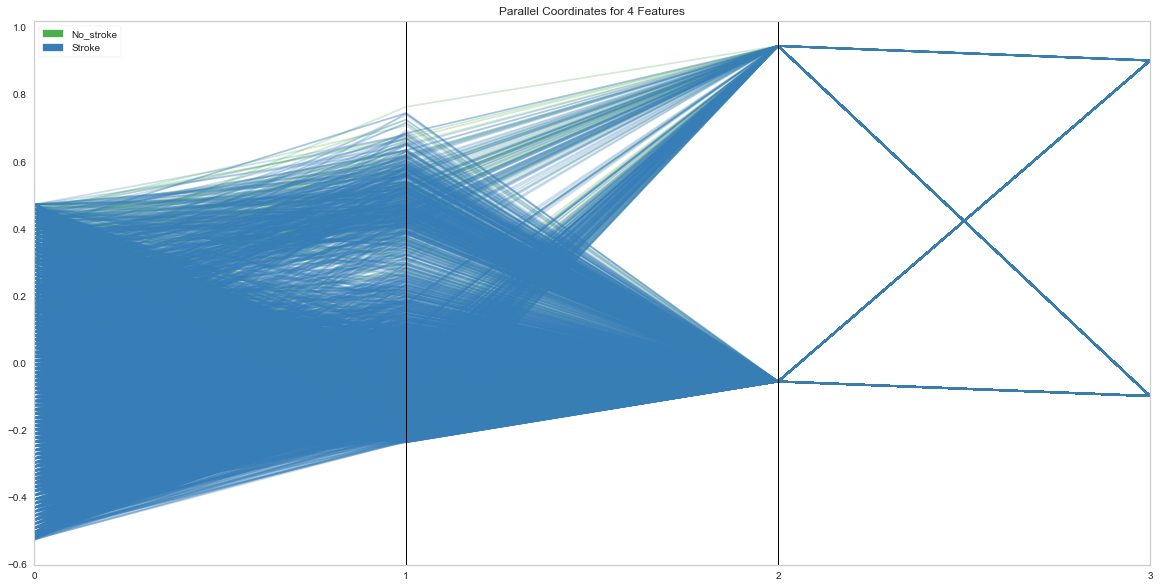

<AxesSubplot:title={'center':'Parallel Coordinates for 4 Features'}>

In [38]:
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)
plt.rcParams['font.size']=50

#set up color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('bold') #color

#import packages
from yellowbrick.features import ParallelCoordinates

#Specify the features of interest and the classes of the target
classes=['Stroke', 'No_stroke']
var=['age', 'avg_glucose_level', 'heart_disease', 'hypertension']

#copy data to new dataframe
data_norm=data.copy()
#normalize data to 0-1 range (for distribution)
for feature in var:
    data_norm[feature]=(data[feature]-data[feature].mean(skipna=True))/(data[feature].max(skipna=True)-data[feature].min(skipna=True))

#extract the numpy arrays
X=data_norm[var].to_numpy()
y=data.stroke.to_numpy()

#instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, feature=var)

visualizer.fit(X,y) #fit data to visualizer
visualizer.transform(X)
visualizer.poof()

#why no variable names showing up in x-axis?


<b>Barplot for the categorical data</b>
<br></br>
Next we will create barplots for the categorical variables in the data set.

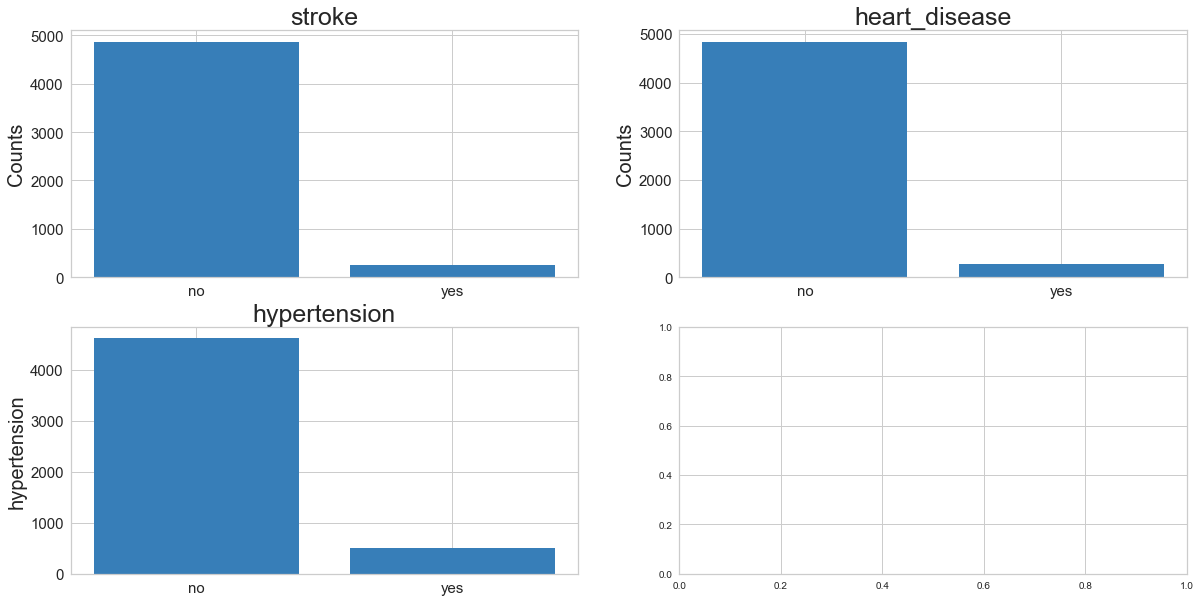

In [48]:
#setup figure size 
%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)

#make subplots
fig, axes=plt.subplots(nrows=2, ncols=2)

#first barplot
X_stroke=data.replace({'stroke':{1:'yes',0:'no'}}).groupby('stroke').size().reset_index(name='Counts')['stroke']
Y_stroke=data.replace({'stroke':{1:'yes',0:'no'}}).groupby('stroke').size().reset_index(name='Counts')['Counts']
axes[0,0].bar(X_stroke, Y_stroke)
axes[0,0].set_title('stroke',fontsize=25)
axes[0,0].set_ylabel('Counts',fontsize=20)
axes[0,0].tick_params(axis='both',labelsize=15)

#2nd barplot
X_heart_disease=data.replace({'heart_disease':{1:'yes', 0:'no'}}).groupby('heart_disease').size().reset_index(name='Counts')['heart_disease']
Y_heart_disease=data.replace({'heart_disease':{1:'yes', 0:'no'}}).groupby('heart_disease').size().reset_index(name='Counts')['Counts']
axes[0,1].bar(X_heart_disease, Y_heart_disease)
axes[0,1].set_title('heart_disease',fontsize=25)
axes[0,1].set_ylabel('Counts',fontsize=20)
axes[0,1].tick_params(axis='both',labelsize=15)

#3rd barplot
X_hypertension=data.replace({'hypertension':{1:'yes',0:'no'}}).groupby('hypertension').size().reset_index(name='Counts')['hypertension']
Y_hypertension=data.replace({'hypertension':{1:'yes',0:'no'}}).groupby('hypertension').size().reset_index(name='Counts')['Counts']
axes[1,0].bar(X_hypertension,Y_hypertension)
axes[1,0].set_title('hypertension',fontsize=25)
axes[1,0].set_ylabel('hypertension',fontsize=20)
axes[1,0].tick_params(axis='both',labelsize=15)

<b>stroke rates depending on categories</b>

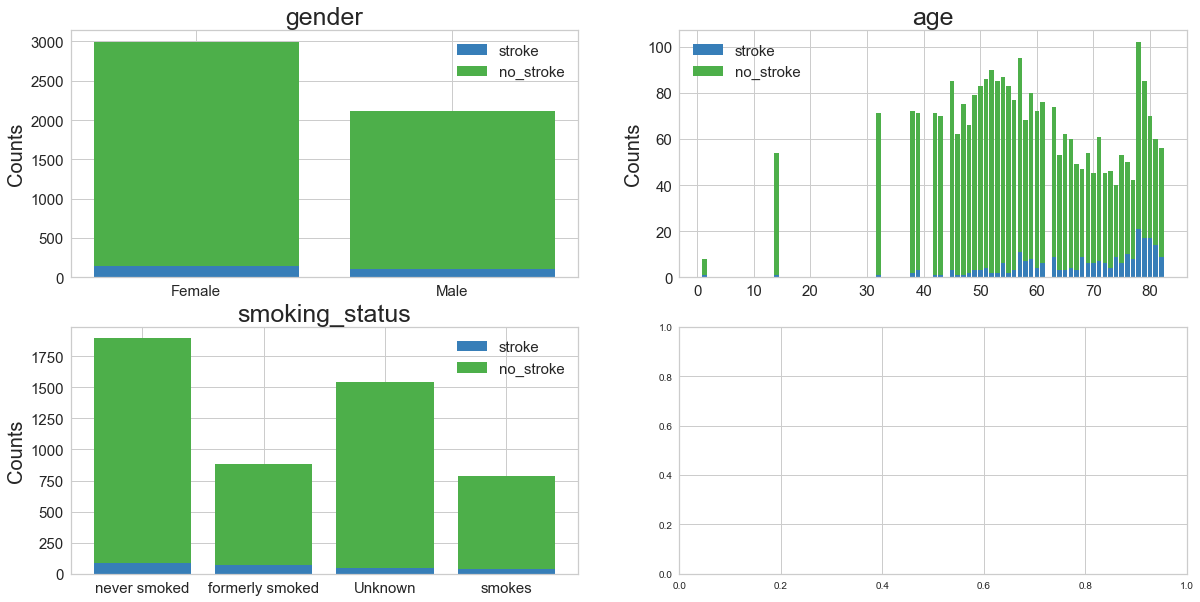

In [59]:
#setup the figure size
%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)

#make subplots
fig, axes=plt.subplots(nrows=2, ncols=2)

#make barplot 1:
#make data read to feed into the visualizer
Gender_stroke=data.replace({'stroke':{1:'yes',0:'no'}})[data['stroke']==1]['gender'].value_counts() #counting gender when stroke=1
Gender_no_stroke=data.replace({'stroke':{1:'yes',0:'no'}})[data['stroke']==0]['gender'].value_counts() #counting gender when stroke=0
Gender_no_stroke=Gender_no_stroke.reindex(index=Gender_stroke.index)
#make barplot
#gender stroke - blue
#gender no stroke - green
p1=axes[0,0].bar(Gender_stroke.index,Gender_stroke.values)
p2=axes[0,0].bar(Gender_no_stroke.index, Gender_no_stroke.values, bottom=Gender_stroke.values)
axes[0,0].set_title('gender',fontsize=25)
axes[0,0].set_ylabel('Counts',fontsize=20)
axes[0,0].tick_params(axis='both',labelsize=15)
axes[0,0].legend((p1[0],p2[0]),('stroke','no_stroke'),fontsize=15) #legend - description of bar boxes at upper left corner

#make barplot 2:
age_stroke=data.replace({'stroke':{1:'yes',0:'no'}})[data['stroke']==1]['age'].value_counts() 
age_no_stroke=data.replace({'stroke':{1:'yes',0:'no'}})[data['stroke']==0]['age'].value_counts() 
age_no_stroke=age_no_stroke.reindex(index=age_stroke.index)
#make barplot
p1=axes[0,1].bar(age_stroke.index,age_stroke.values)
p2=axes[0,1].bar(age_no_stroke.index, age_no_stroke.values, bottom=age_stroke.values)
axes[0,1].set_title('age',fontsize=25)
axes[0,1].set_ylabel('Counts',fontsize=20)
axes[0,1].tick_params(axis='both',labelsize=15)
axes[0,1].legend((p1[0],p2[0]),('stroke','no_stroke'),fontsize=15)

#make barplot 3:
smoke_stroke=data.replace({'stroke':{1:'yes',0:'no'}})[data['stroke']==1]['smoking_status'].value_counts() 
smoke_no_stroke=data.replace({'stroke':{1:'yes',0:'no'}})[data['stroke']==0]['smoking_status'].value_counts() 
smoke_no_stroke=smoke_no_stroke.reindex(index=smoke_stroke.index)
#make barplot
p1=axes[1,0].bar(smoke_stroke.index,smoke_stroke.values)
p2=axes[1,0].bar(smoke_no_stroke.index, smoke_no_stroke.values, bottom=smoke_stroke.values)
axes[1,0].set_title('smoking_status',fontsize=25)
axes[1,0].set_ylabel('Counts',fontsize=20)
axes[1,0].tick_params(axis='both',labelsize=15)
axes[1,0].legend((p1[0],p2[0]),('stroke','no_stroke'),fontsize=15)